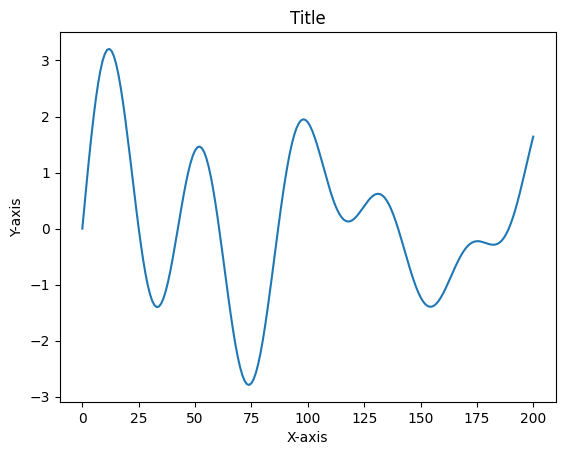

In [1]:
from Circuits.Ising import initialize_Ising_circuit
from Circuits.MPS import initialize_MPS_circuit
from DataPreprocessing import full_signal
from Functions.TrainingFuncs import *

In [2]:
# Specify path using data, model and hyperparameters. For example: 'Results/Apple/Ising/100Epochs/'
path = 'Results/Test/'

In [3]:
circuit, weights, n_qubits = initialize_MPS_circuit()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
train, test, train_size, test_size, train_ratio, indices = split_train_test(full_signal, n_qubits, random = True)
final_train, final_test, scaler = scale_data(train, test, train_size, test_size, n_qubits)

100%|██████████| 10/10 [00:02<00:00,  4.99it/s]


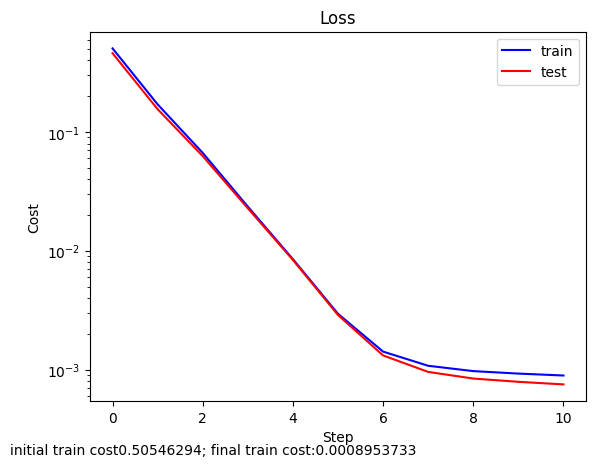

In [5]:
weights, x_t, target_y_t = train_model(final_train, final_test, weights, circuit, n_qubits, max_steps = 10, epochs = 10, bool_plot=True, save_plot=path, learning_rate=0.1)

In [6]:
results_and_params = {
    "n_qubits" : n_qubits,
    "indices" : indices,
    "scaler" : scaler,
    "weights" : weights,
    "inputs" : x_t,
    "targets" : target_y_t
}

In [7]:
save_results_params(results_and_params, path)